<a href="https://colab.research.google.com/github/Durjoy001/Data-Science/blob/main/tesxt_classification_by_using_artificial_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import glob
import pandas as pd
import numpy as np
import os

In [2]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time
import re 

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix
import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = "/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/*.xlsx"
all_file = glob.glob(path)

In [5]:
all_file


['/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType10.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType1.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType11.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType9.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType3.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType14.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType17.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType16.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType2.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType5.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType4.xlsx',
 '/content/drive/MyDrive/Colab Notebooks/Assignment 2/songData/songType12.xlsx',
 '/content/drive/MyDrive/Colab Not

In [6]:
names = []
count = []
clusters = []
data = []

for each in all_file:
    temp = pd.read_excel(each)
    
    
    count.append(len(temp))
    names.append(each.split('/')[1][:-5])
    clusters.append(temp['songType'])
    
    
    data.append(temp)
    
cluster_ids =clusters

In [7]:
data = pd.concat(data)
data = data.sample(frac = 1)

data

,Unnamed: 0,lyrics,songType
286,1466,হারানো চোখ হারানো মন হারানো গান হারানো সুর হার...,13
583,2200,এই উদাসী হাওয়ার পথে পথে মুকুলগুলি ঝরে আমি কুড়ি...,17
815,3499,সাগর সঙ্গমে সাঁতার কেঁটেছি কত কখনতো হই নাই ক্ল...,1
38,2755,ও..ও..ও.. গরিয়া তুই কোথায়রে ওহো ও হো হো গরিয়া…...,9
108,607,তুমি আমার চোখে চেয়ে আশার প্রদীপ জ্বেলেছিলে হাত...,13
...,...,...,...
353,2234,মন মাঝি তোর বৈঠা নে রে আমি আর বাইতে পারলাম না।...,3
131,2113,শাওন রাতে যদি স্মরণে আসে মোরে বাহিরে ঝড় বহে নয়...,7
142,1283,কোন্‌ পুরাতন প্রাণের টানে ছুটেছে মন ...,17
13,1422,রিক্সা চালাও রসিক বন্ধু সামনের রাস্তা দিয়া। মু...,10


In [8]:
stop_words = [ 'হাই', 'ফ্রিকুয়েন্সি', 'কিন্তু', 'অপ্রয়োজনীয়', 'শব্দ' ]

In [9]:
data['lyrics'] = data['lyrics'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [10]:
X_train, X_test, y_train, y_test =  train_test_split(data['lyrics'], data['songType'], test_size=0.33, random_state=42 )

In [11]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import metrics

total_data_count = len(data)
per_class_counts = []
unique_classes = np.unique(data['songType'].values)
class_count_mean = np.mean(count)

###########################3
############### classifier setup ################

from sklearn.neural_network import MLPClassifier
text_clf_svm = Pipeline([
    
    ('vect', CountVectorizer(
                            analyzer="word", 
                            lowercase=False,
                            token_pattern="[\S]*",
                            tokenizer=None,
                            ngram_range=(1, 3),
                            preprocessor=None)),                 
    ('tfidf', TfidfTransformer()),
    ('clf-svm',MLPClassifier()),
                                                                        
])
classifier = text_clf_svm.fit(list(X_train), list(y_train))


cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
score = cross_val_score(text_clf_svm, list(X_train), list(y_train), cv=cv)

print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))


predicted = classifier.predict(X_test)

Cross Accuracy: 0.53 (+/- 0.02)


In [12]:
print("Cross Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
print(metrics.classification_report(y_test, predicted))

Cross Accuracy: 0.53 (+/- 0.02)
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.45      0.63      0.53       329
           2       0.00      0.00      0.00         4
           3       0.44      0.60      0.51       232
           4       0.00      0.00      0.00         2
           5       0.33      0.06      0.10        18
           6       0.88      0.22      0.35        32
           7       0.78      0.28      0.41        76
           8       0.00      0.00      0.00         9
           9       0.00      0.00      0.00        23
          10       0.33      0.07      0.12        14
          11       0.00      0.00      0.00        12
          12       0.33      0.02      0.04        47
          13       0.56      0.52      0.54       233
          14       0.00      0.00      0.00        18
          15       1.00      0.75      0.86         4
          16       0.00      0.00      0.00      

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
import pandas as pd
confusion_matrix = list(metrics.confusion_matrix(y_test, predicted))

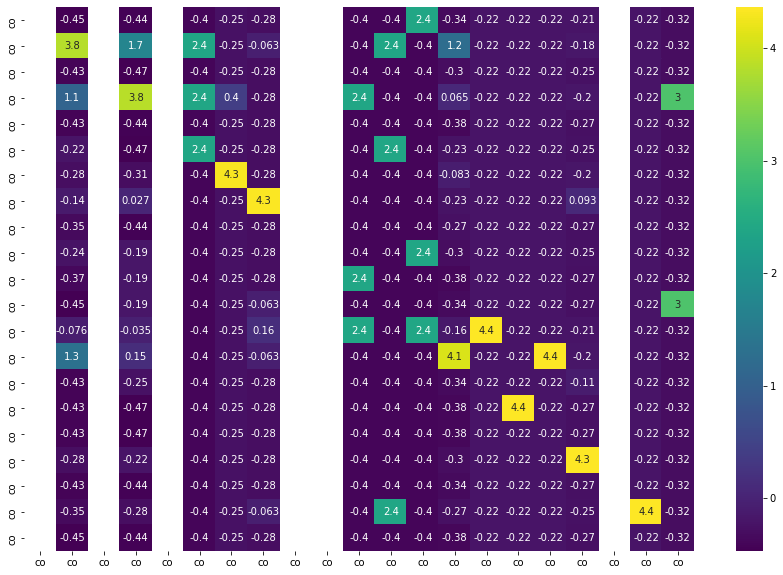

In [15]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix
df_cm = pd.DataFrame(array, index = [i for i in names],
              columns = [i for i in names])
df_norm_col=(df_cm-df_cm.mean())/df_cm.std()
#df_norm_col=df_cm-df_cm.mean()
plt.figure(figsize = (15,10))
sn.heatmap(df_norm_col, annot=True,cmap='viridis')